In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
import matplotlib

In [9]:
df = pd.read_csv(r'/Users/julianwere/Documents/Arrests Data/arrests-data.csv', index_col = False)

In [10]:
path = r'/Users/julianwere/Documents/Arrests Data'

In [12]:
df.head()

,Unnamed: 0,Measure,Year,Ethnicity,Gender,Age_Group,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,0,Number of arrests,2018/19,All,Female,All,All,Police Force Area,97117.0,27760111,3.50,1.000
1,1,Number of arrests,2018/19,All,Male,All,All,Police Force Area,574009.0,26854908,21.37,1.000
2,2,Number of arrests,2018/19,All,All,All,All,Police Force Area,671126.0,54615019,12.29,1.000
3,3,Number of arrests,2018/19,Any other asian,Female,All,All,Police Force Area,966.0,424764,2.27,0.011
4,4,Number of arrests,2018/19,Any other asian,Male,All,All,Police Force Area,11721.0,403496,29.05,0.023


# Data Checks

In [ ]:
# checking matplotlib. version

In [13]:
matplotlib.__version__

'3.4.3'

In [ ]:
# Check for missing values

In [14]:
df.isnull().sum()

Unnamed: 0                                                                                                                   0
Measure                                                                                                                      0
Year                                                                                                                         0
Ethnicity                                                                                                                    0
Gender                                                                                                                       0
Age_Group                                                                                                                    0
Geography                                                                                                                    0
Geography_type                                                                                                 

In [ ]:
#check for mixed values

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
        #no mixed values

In [16]:
df_dups = df[df.duplicated()]

In [17]:
df_dups

,Unnamed: 0,Measure,Year,Ethnicity,Gender,Age_Group,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"


In [ ]:
# no dups

# Questions explored

In [18]:
df.corr()

,Unnamed: 0,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
Unnamed: 0,1.000000,0.005361,-0.014358,0.037539,0.001214
Number of arrests,0.005361,1.000000,0.903561,-0.012335,0.218602
"Population by ethnicity, gender, and PFA (based on 2011 Census)",-0.014358,0.903561,1.000000,-0.031884,0.243776
"Rate per 1,000 population by ethnicity, gender, and PFA",0.037539,-0.012335,-0.031884,1.000000,-0.109330
"Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",0.001214,0.218602,0.243776,-0.109330,1.000000


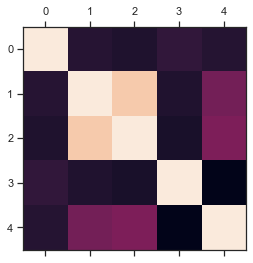

In [19]:
plt.matshow(df.corr())
plt.show()

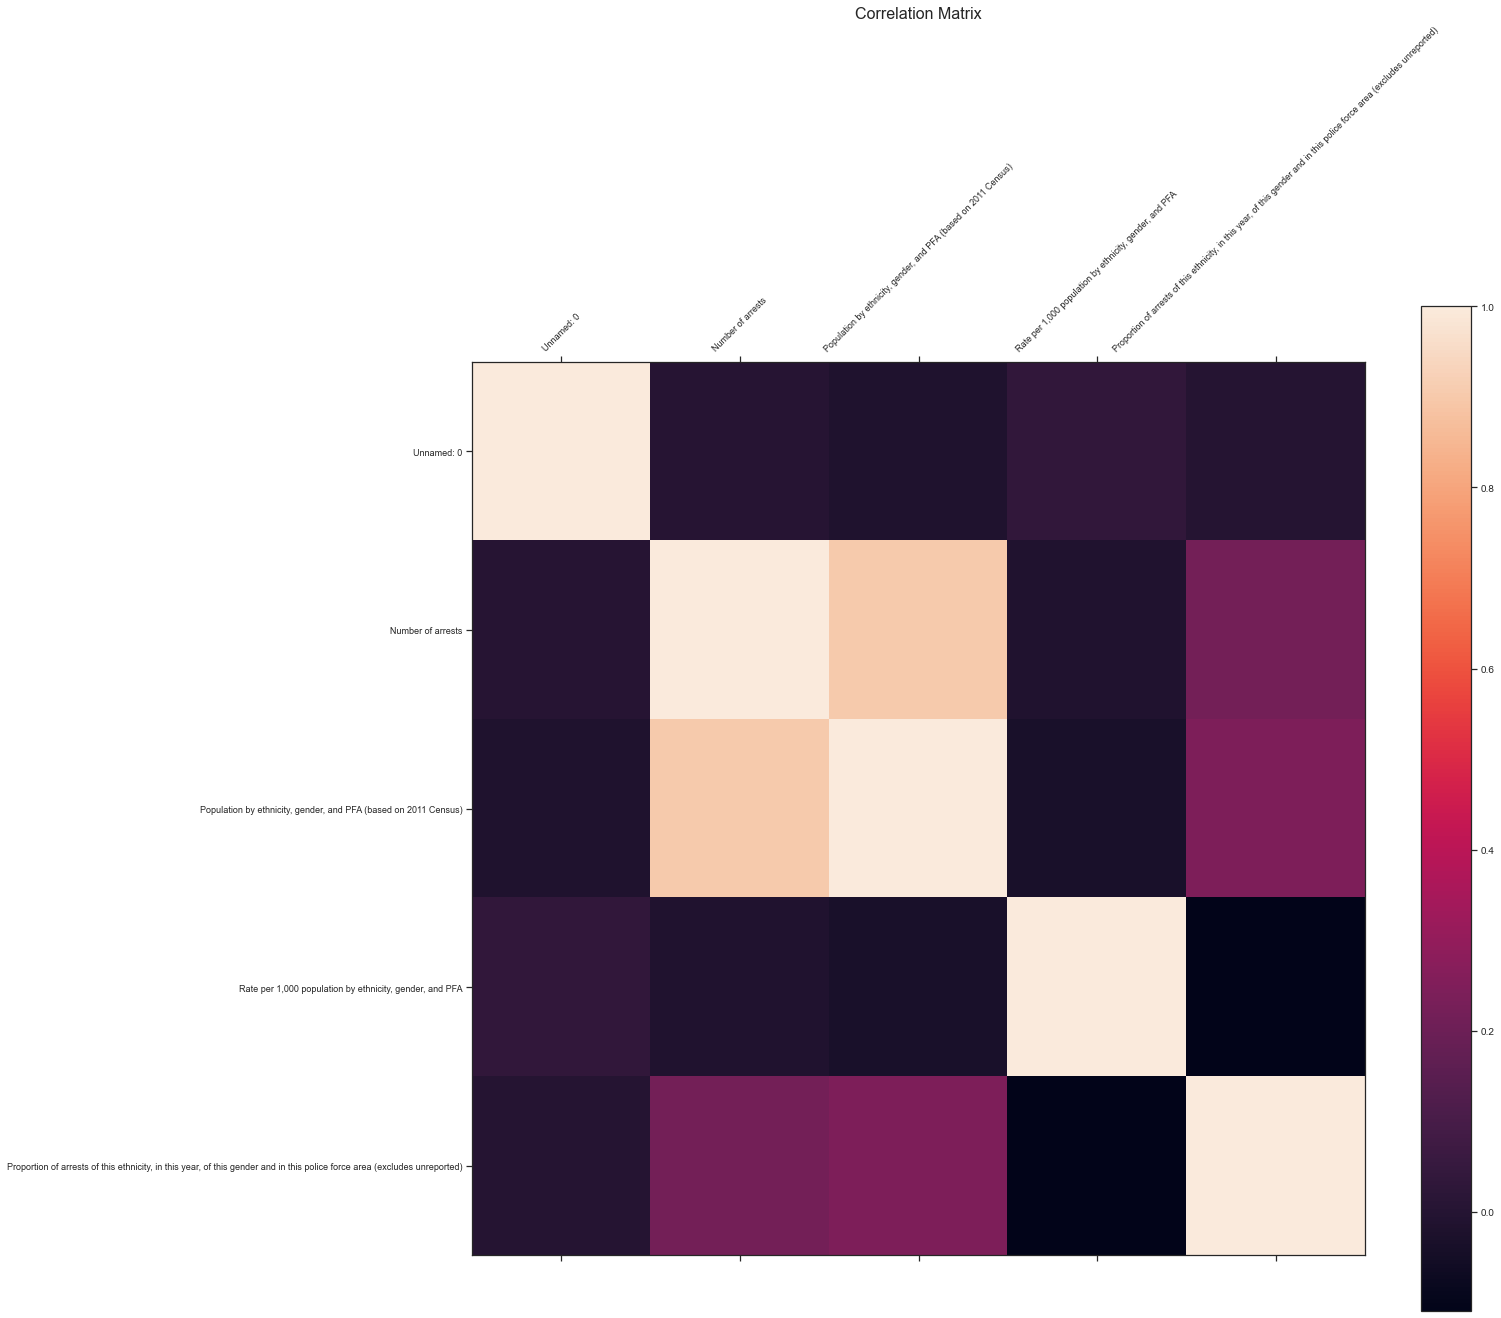

In [20]:
f = plt.figure(figsize=(20, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

In [21]:
df.columns

Index(['Unnamed: 0', 'Measure', 'Year', 'Ethnicity', 'Gender', 'Age_Group',
       'Geography', 'Geography_type', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'],
      dtype='object')

In [22]:
sub = df[['Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)']]

In [23]:
sub

,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,97117.0,27760111,3.50,1.000
1,574009.0,26854908,21.37,1.000
2,671126.0,54615019,12.29,1.000
3,966.0,424764,2.27,0.011
4,11721.0,403496,29.05,0.023
...,...,...,...,...
16300,4839.0,305406,15.84,0.819
16301,5686.0,616753,9.22,0.827
16302,10.0,2200,4.55,0.010
16303,45.0,2033,22.13,0.008


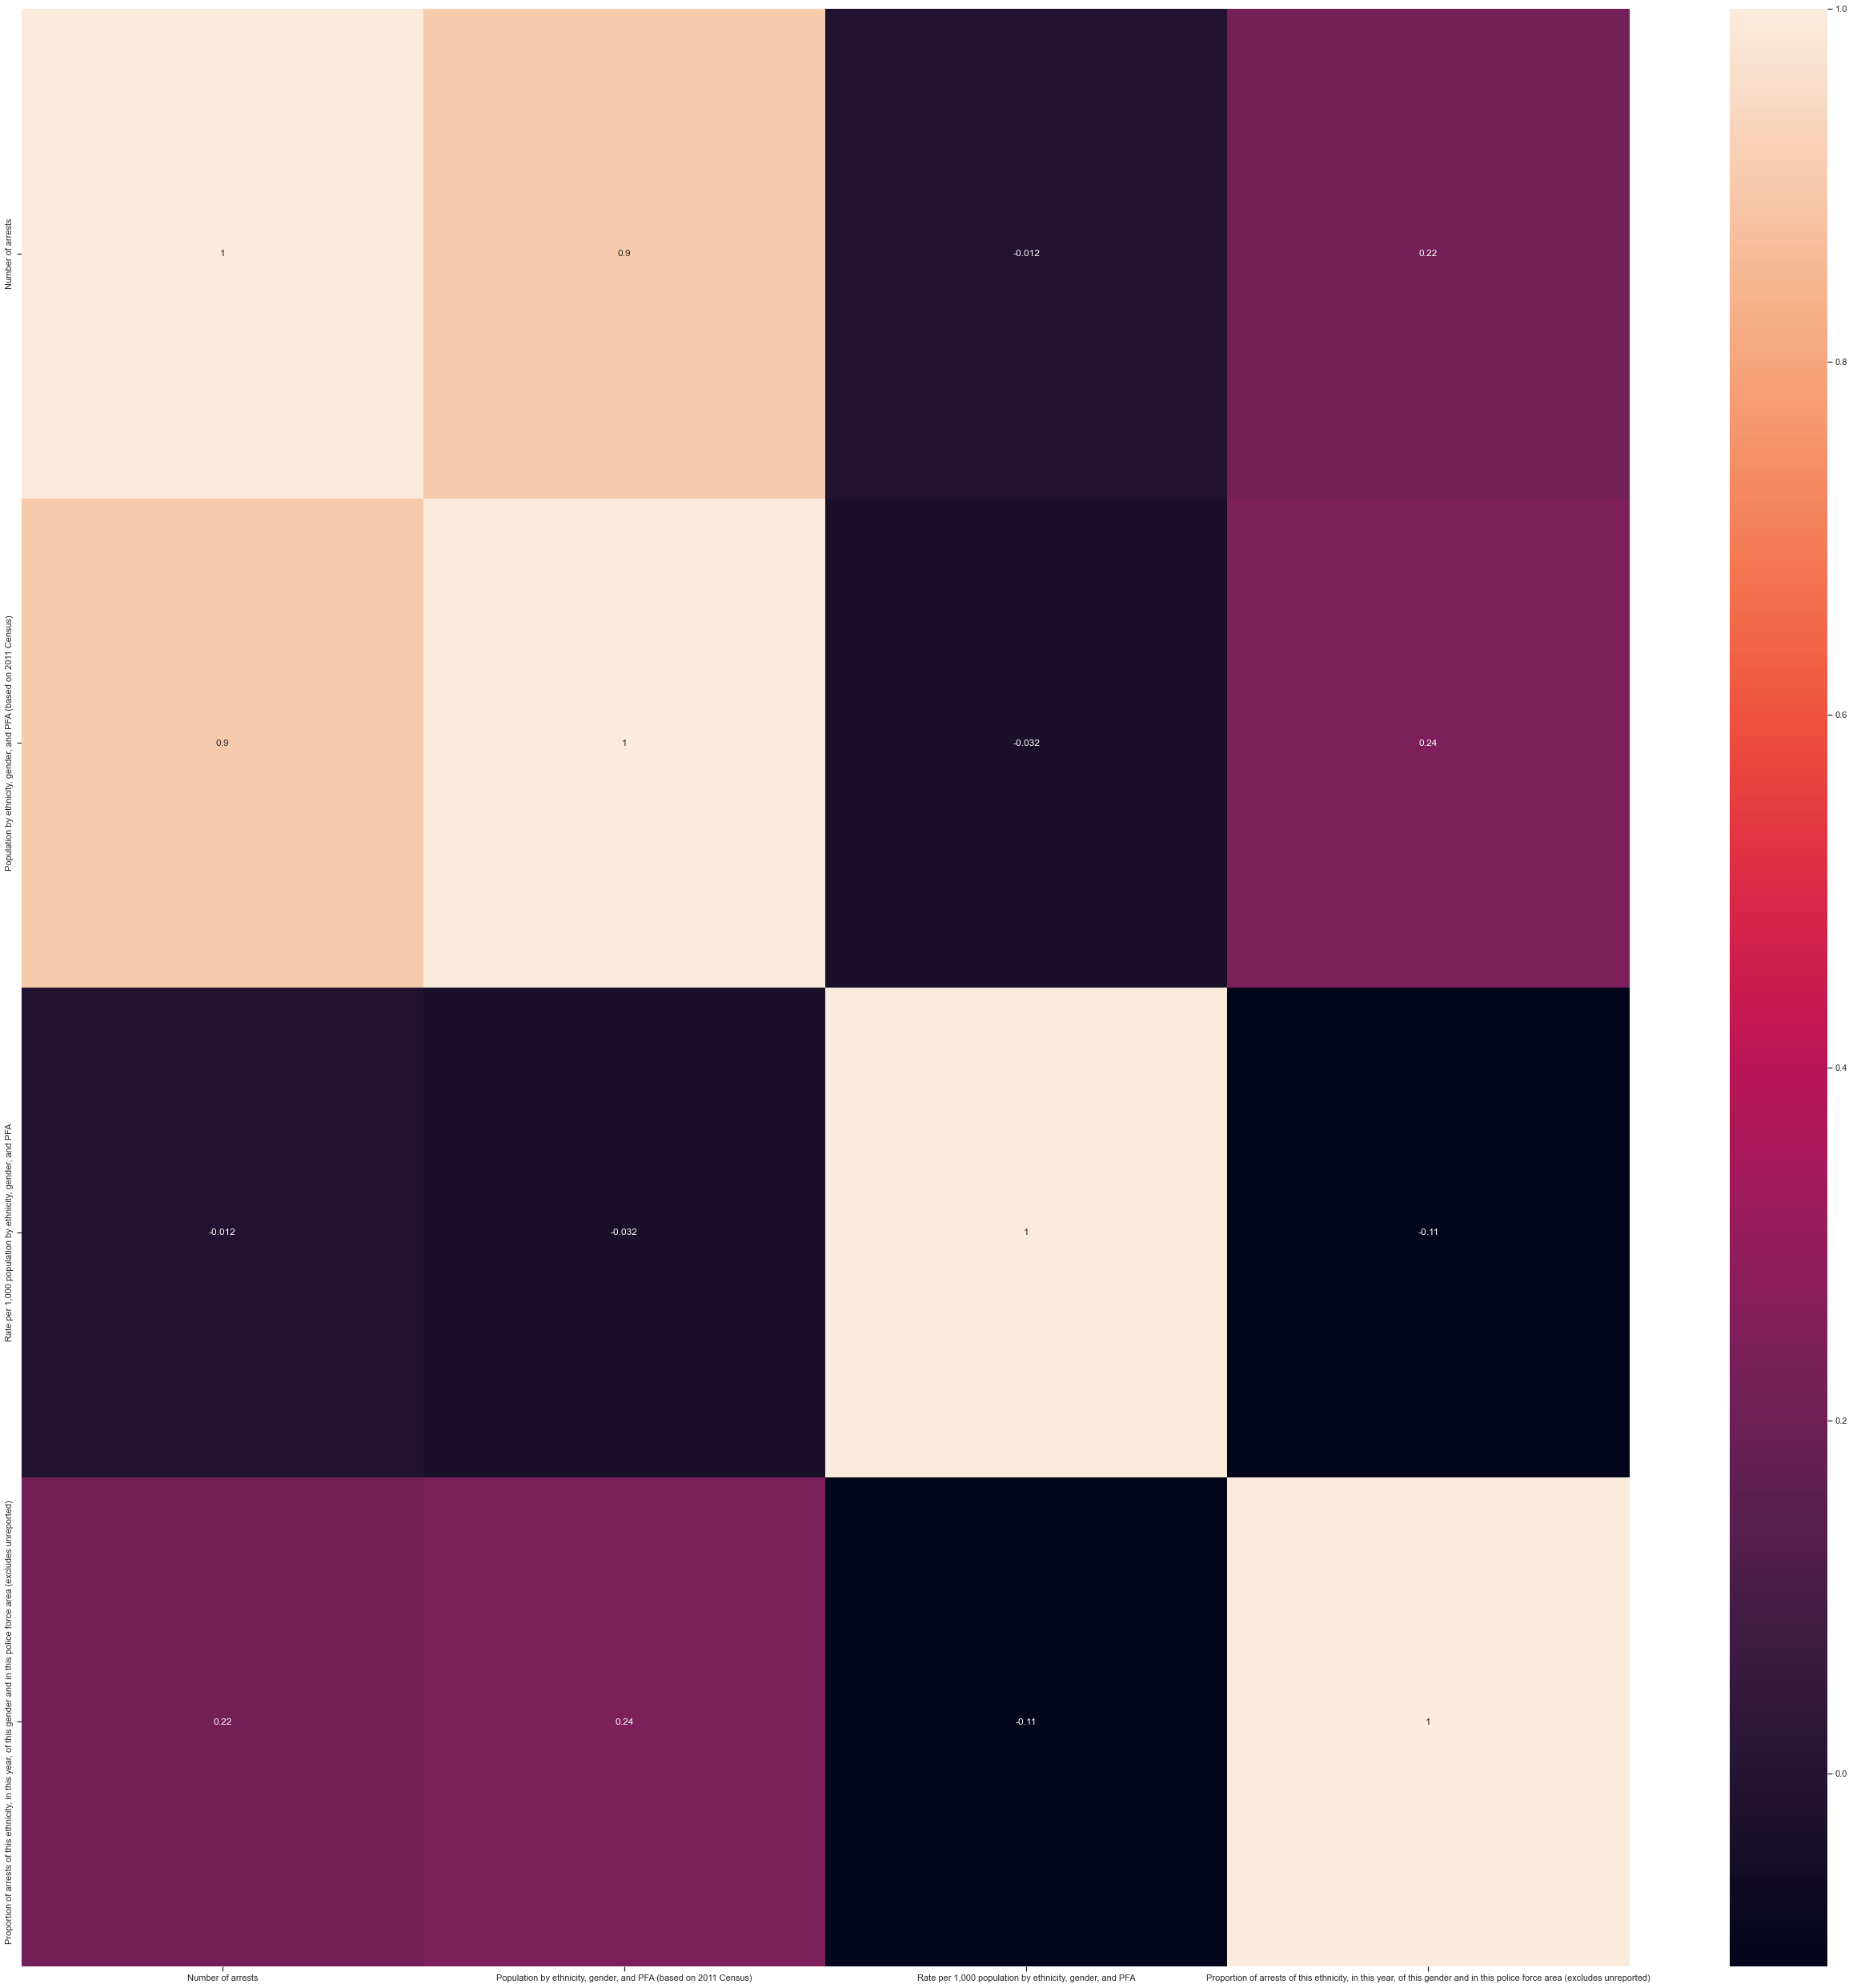

In [24]:
f,ax = plt.subplots(figsize=(45,45))


# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# Scatterplots

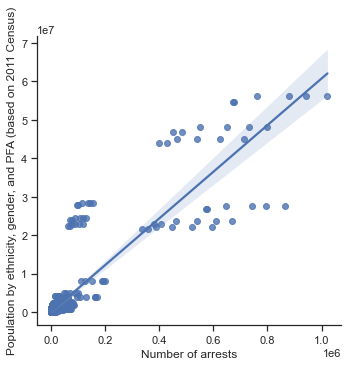

In [25]:
# Create a scatterplot 

sns.lmplot(x = 'Number of arrests', y = 'Population by ethnicity, gender, and PFA (based on 2011 Census)', data = df)

In [ ]:
# Create Pairplots

In [26]:

sub_2 = sub[['Number of arrests', 'Rate per 1,000 population by ethnicity, gender, and PFA','Population by ethnicity, gender, and PFA (based on 2011 Census)',]]

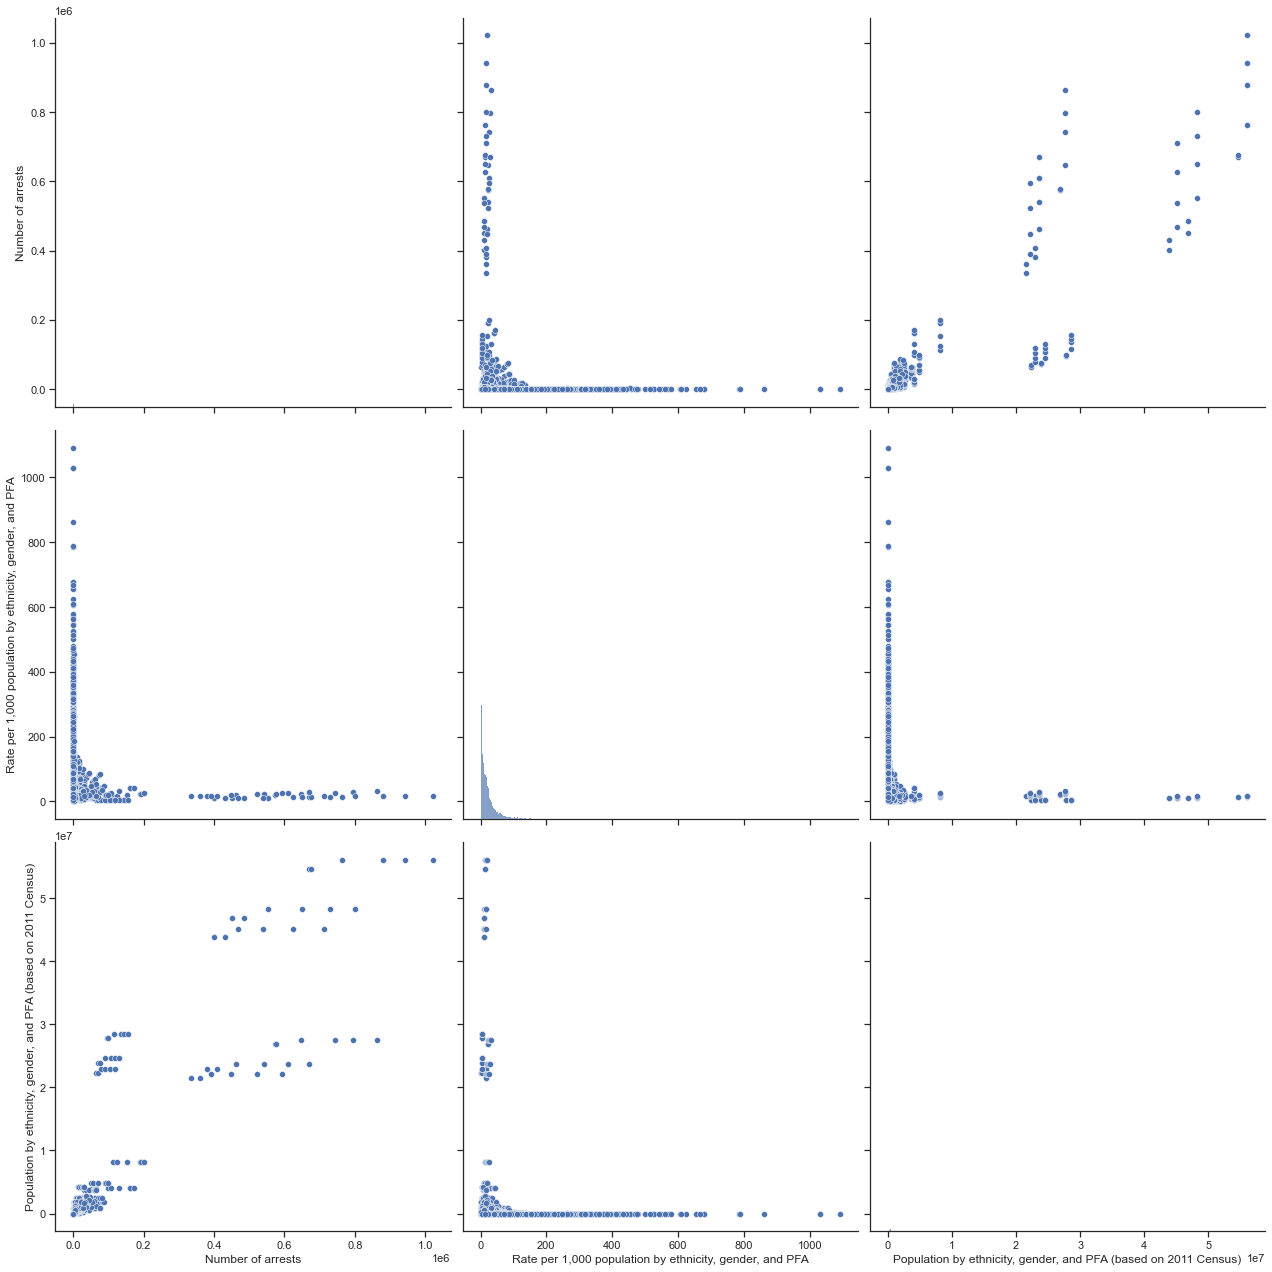

In [27]:
g = sns.pairplot(sub_2, height = 6)

# Categorical Plots

In [ ]:
# Create categorical plots

<AxesSubplot:xlabel='Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)', ylabel='Count'>

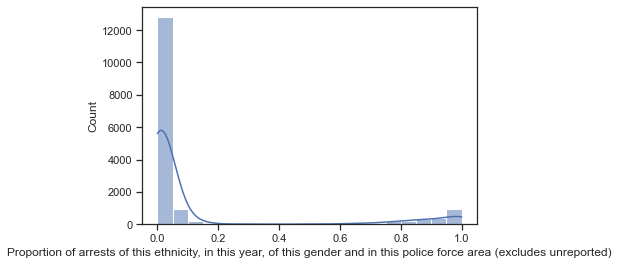

In [28]:
sns.histplot(df['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'], bins = 20, kde = True)



In [ ]:
# In this case there were no middle group of arrests, ranging from low to high

In [29]:
df.loc[df['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'] < 0.2, 'arrests category'] = 'Low arrests'

In [30]:
df.loc[df['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'] >= 0.8, 'arrests category'] = 'high arrests'

In [31]:
df['arrests category'].value_counts(dropna = False)

Low arrests     14001
high arrests     1851
NaN               453
Name: arrests category, dtype: int64

In [174]:
df.columns

Index(['Unnamed: 0', 'Measure', 'Year', 'Ethnicity', 'Gender', 'Age_Group',
       'Geography', 'Geography_type', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)',
       'arrests category'],
      dtype='object')

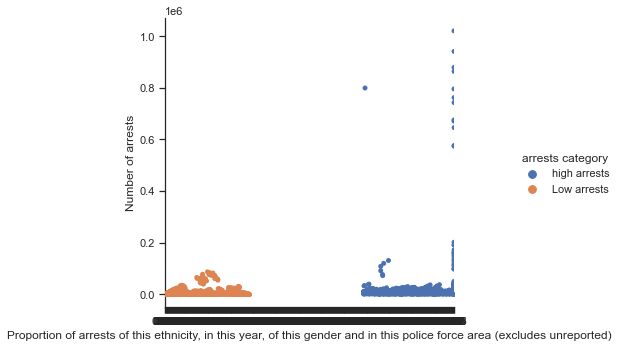

In [33]:
# Creating a second version of a categorical plot in seaborn using the arrest categories shown above

sns.set(style="ticks")
g = sns.catplot(x="Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)", y="Number of arrests", hue="arrests category", data=df)

In [34]:
df.to_csv(os.path.join(path, 'arrests-data1.csv'))